#Classification de la base MNIST par réseau de neurones

###Question 1 :


En utilisant la classe
```
CLASS torchvision.datasets.MNIST
```
documentée ici :

https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

et sur le modèle du TP4, définir les objets `trainset`, `trainloader`, `testset`, `testloader` et `classes` en définissant une fonction transform qui ramène les niveaux de gris dans l'intervalle $[-1,1]$.

Afficher quelques images avec leur classe correspondante.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import time

In [ ]:
# Définition d'une transformation pour normaliser les niveaux de gris dans [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(), # Convertion des images en tenseurs
     transforms.Normalize((0.5,), (0.5,))]) # Normalisation des valeurs des pixels entre -1 et 1

batch_size = 16   # définir la taille de lot

# Chargement de l'ensemble de données MNIST pour l'entraînement
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

# Création d'un chargeur de données pour l'ensemble de données d'entraînement
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Chargement de l'ensemble de données MNIST pour les tests
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

# Création  d'un chargeur de données pour l'ensemble de données de test
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
# Création d'une instance de l'ensemble de données MNIST
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 200605600.19it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27808928.79it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 62931811.24it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7129688.91it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Notre objectif général du code ci-dessus est de charger l'ensemble de données MNIST pour la classification d'images en utilisant des chargeurs de données pour l'entraînement et les tests.

Plus spécifiquement,
- On a commencer par la définition de la transformation transform qui nous permet de transformer et de normalise les niveaux de gris des images dans l'intervalle [-1, 1].
code explication : transforms.ToTensor veut dire quant on rencontre une image on veut qu'elle soit en format tensor et transforms.Normalize pour une normalisation parceque nos image sont de base entre 0 et 1 et nous on veux travailler avec des images qui sont entre -1 t 1 parceque nos fonctions d'activation sont centrées en 0 alors le mieux est que nos données soient aussi centrées en 0.Dans le tp4 vu en cours La moyenne et l'écart-type sont définis avec un triplet à (0.5, 0.5, 0.5) pour centrer les valeurs des canaux couleur autour de 0. Mais ici comme, on a des image en niveau de gris donc à la place des triplet une seul car on a un seul cannal.  Ensuite viens la définition de la taille de lot à utiliser lors du chargement des données dans le modèle.

- Après la définition de la transformation, nous sommes passé au chargement de l'ensemble de données MNIST pour l'entraînement et les tests en utilisant la classe torchvision.datasets.MNIST. Pour info le jeu de données MNIST normalement contient 70 000 images, avec 60 000 images pour l'entraînement et 10 000 images pour les tests.c'est la même idée comme vu au premier cours en utilisant les pourcentages ( 80% de données pour l'entrinement,10% pour le test et 10% pour la validation). En plus Chaque image a une taille de 28 x 28 pixels et est représentée sous forme de tenseur 2D avec des valeurs de pixel comprises entre 0 et 255.

- Les objets trainset et testset defini ci-déssus contiennent les images et les étiquettes de chaque ensemble de données, qui sont utilisés pour créer les chargeurs de données trainloader et testloader à l'aide de torch.utils.data.DataLoader. Les chargeurs de données sont configurés avec une taille de lot que nous allons nommer batch_size.

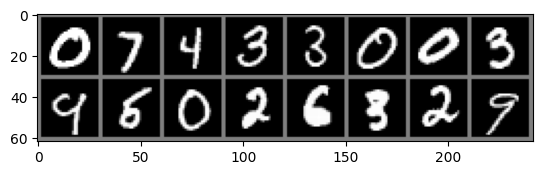

zero  seven four  three three zero  zero  three nine  five  zero  two   six   three two   nine 


In [ ]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
classes = ('zero', 'one', 'two', 'three',
           'four', 'five', 'six', 'seven', 'eight', 'nine')
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Dans le code ci-déssus, nous avons défini une fonction imshow pour afficher une image normalisée. La fonction prend un tenseur d'image normalisé en entrée et le dénormalise en multipliant par 0,5 et en ajoutant 0,5. Ensuite, elle convertit le tenseur en un tableau NumPy et l'affiche avec matplotlib.pyplot.imshow.

Nous avons également utilisé la fonction iter pour obtenir un itérateur sur les lots du jeu de données d'entraînement, puis la méthode next pour obtenir le prochain lot d'images et d'étiquettes. Nous avons ensuite affiché les images avec leurs classes correspondantes en utilisant la fonction imshow et en imprimant les étiquettes de classe correspondantes avec print.

En exécutant ce code, on voit quelques images du jeu de données MNIST avec leurs classes correspondantes

###Question 2 :




Décrire quantitativement la base de données en répondant aux questions suivantes :

* Quelle est la taille de chaque image ?
* Combien y a-t-il d'images au total pour `trainset` et `testset` ?
* Combien d'images par classe ?
* Combien de classes ?

On pourra proposer un script pour répondre aux questions.

Décrivons quantitativement la base de données en répondant aux questions posées ci-déssur;

- La taille de chaque image est de 28x28 pixels.

- Il y a 60000 images dans trainset et 10000 images dans testset.

- Il y a 6000 images par classe dans trainset et 1000 images par classe dans testset.

- Il y a 10 classes correspondant aux chiffres de 0 à 9.

In [ ]:
# Obtention d'une image à partir de l'ensemble de données
sample_image, _ = mnist_dataset[0]

# Obtention de la taille de l'image
image_size = sample_image.size
print("La taille de chaque image est : ", image_size )

# Nombre total d'images pour trainset et testset
trainset_im = len(trainset)
testset_im = len(testset)
print("Le nombre total d'images pour trainset est : ",trainset_im )
print("Le nombre total d'images pour testset est : ", testset_im)

# Nombre d'images par classe
im_per_class_trainset = [0]*10
im_per_class_testset = [0]*10

for image, label in trainloader:
    for l in label:
        im_per_class_trainset[l] += 1

for image, label in testloader:
    for l in label:
        im_per_class_testset[l] += 1

print("Le nombre d'images par classe pour trainset est : ", im_per_class_trainset)
print("Le nombre d'images par classe pour testset est : ", im_per_class_testset)

# Affichage du nombre de classes
print("Le nombre de classes est : ", len(set(trainset.classes)))

La taille de chaque image est :  (28, 28)
Le nombre total d'images pour trainset est :  60000
Le nombre total d'images pour testset est :  10000
Le nombre d'images par classe pour trainset est :  [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
Le nombre d'images par classe pour testset est :  [980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
Le nombre de classes est :  10


## Réseau de neurones convolutionnel (CNN)

On souhaite définir un réseau de neurones convolutionnel (CNN) qui s'applique aux images de `MNIST`et effectue la suite d'opérations suivante :

**Partie CNN :**
 * Une convolution 2D de noyau de taille 5x5 avec 16 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2
 * Une convolution 2D de noyau de taille 5x5 avec 32 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2

**Partie linéaire :**
 * Une couche linéaire finale permettant la classification.



###Question 3 :

Etant donnée un batch `x` (dont on précisera les dimensions) en entrée du CNN, expliciter les dimensions des tenseurs en entrée et en sortie de chacune des couches successives du réseau. On prendra soin de préciser les opérations nécessaires pour passer de la partie CNN à la partie linéaire.

Expliciton les dimensions des tenseurs en entrée et en sortie de chacune des couches successives du réseau:

Le réseau de neurones convolutionnel qui s'applique aux images de MNIST et effectue la suite d'opérations donnée ci-déssus est:

en supposant un batch x de dimensions (16, 1, 28, 28) avec 16 est le batch_size, 1 pour le cannal d'entré et (28,28) pour la taille des images de MNIST on a:

Explication sans prendre compte du batch_size sachant qu'on a batch_size = 16 a chaque fois.

- Première couche de convolution :
En entrée on a une image de taille: (1, 28, 28) avec un Noyau de convolution de taille (1, 5, 5) et on a en sortie une image de taille (16, 24, 24)
suivie d'une activation ReLU qui change ni la taille de l'image ni le nombre de cannal comme suit  Entrée image (16, 24, 24) et Sortie image (16, 24, 24).
- max-pooling1 : qui prend entrée une image (16, 24, 24) après le pooling on se retrouve en sortie avec une image (16, 12, 12) rappelons que 16 represente les cannaux.

- La séconde Couche de convolution:
Entrée, cette couche prende l'image obténu à la sortie du pooling qui est de taile (16, 12, 12) avec un Noyau de convolution (16, 5, 5), nous obtenons en Sortie (32, 8, 8) rappelons que le batch_size de l'image reste toujours celui de l'image de départ.
Ensuite, vient l'activation ReLU qui ne change pas la taille de l'image c'est à dire qu'après l'activation la taille d'image est toujours (32, 8, 8)
- max-pooling2 : avant le pooling on a une image de taille (32, 8, 8) après le poolins on se retrouve en sortie avec une image de taille (32, 4, 4)

- Couche linéaire : pour la couche lineaire on a en Entrée une image (32, 4, 4) (après la mise en forme) avec un Poids : (10, 512) et au final une image de Sortie (16, 10) avec 10 qui est le nombre de classe de MNIST

POUR RESUMER ON A:

-- Couche de convolution 1 : entrée (1, 28, 28) → sortie (16, 24, 24)

-- Activation ReLU : entrée (16, 24, 24) → sortie (16, 24, 24)

-- pooling : entrée (16, 24, 24) → sortie (16, 12, 12)

-- Couche de convolution 2 : entrée (16, 12, 12) → sortie (32, 8, 8)

-- Activation ReLU : entrée (32, 8, 8) → sortie (32, 8, 8)

-- pooling : entrée (32, 8, 8) → sortie (16, 32, 4, 4)

-- Couche linéaire : entrée (32, 4, 4) → sortie (16, 10)

Précisons les opérations nécessaires pour passer de la partie CNN à la partie linéaire.

ici dans le cas d'une image de MNIST on a en entrée une image de taille (1,28,28) pendant la première convolution comme on veux un utiliser un noyau de taille (1,5,5) on utilise la formule vu en cours (nbr de canal,M-2*k ,M-2*k) avec 2*k+1=5  pour avoir la taille de l'image de sortie donc k=2 ici dans notre cas. En sortie aprés la convolution on aura une image de taille (16, 28-2*k, 28-2*k) = (16,24,24) avec 16 nombre de cannal en sortie voulu après on a le pooling qui divise la taille de l'image par 2 donc on aura en sortie (16,24/2,24/2)=(16,12,12) avec l'activation aussi. Ensuite pour la deuxième couche de convolution On prend l'image de la sortie de la première convolution et on fait la procédue donc au final on se retrouve avec une image de taille (32,4,4) avec 32 le nombre de canal qui est l'image a utilisé pour la couche linaire.

###Question 4 :

Définir une class `CNNet` qui implémente le modèle décrit ci-dessus.

Définir un réseau cnnet = CNNet() et tester sa fonction `forward` sur un batch du `trainset`.

Afficher quel est le nombre de paramètres du réseau.

In [ ]:
class CNNet(nn.Module):
    def __init__(self):
        super(CNNet,self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc = nn.Linear(32*4*4, 10)


    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

cnnet = CNNet()
print(cnnet)

# Récupération d'un batch du trainset
images, labels = next(iter(trainloader))

output = cnnet(images)

print("Taille de la sortie : ", output.size())

# Calcul du nombre de paramètres du réseau
num_params = sum(p.numel() for p in cnnet.parameters())
print("Nombre de paramètres du réseau : ", num_params)

CNNet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=512, out_features=10, bias=True)
)
Taille de la sortie :  torch.Size([16, 10])
Nombre de paramètres du réseau :  18378


le code ci-dessus a pour objectif de définir un réseau de neurones convolutionnel qui s'applique aux images de MNISTet effectue la suite d'opérations suivante :
Une convolution 2D de noyau de taille 5x5 avec 16 canaux en sortie, suivie d'une activation ReLU.
Un max-pooling 2D de taille 2x2
Une convolution 2D de noyau de taille 5x5 avec 32 canaux en sortie, suivie d'une activation ReLU.
Un max-pooling 2D de taille 2x2
Une couche linéaire finale permettant la classification.

la sortie de ce code nous indique la taille du tenseur de sortie et le nombre total de paramètre du reseau de neuron.

CNNet(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=512, out_features=10, bias=True)
): Cette partie de la sortie du code affiche un résumé de l'architecture du réseau. Chaque couche est affichée avec son type (Conv2d ou Linear), ainsi que ses caractéristiques d'entrée et de sortie. Par exemple, << Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1)) >> signifie qu'il y a une couche de convolution avec une entrée de taille 1, une sortie de taille 16, une taille de noyau de 5x5 et un stride de 1x1. De même, << Linear(in_features=512, out_features=100, bias=True) >> indique qu'il y a une couche linéaire avec 512 caractéristiques d'entrée, 100 caractéristiques de sortie et un biais.

##Entraînement du réseau

###Question 5 :



Proposer un script qui entraîne le réseau `cnnet` sur 10 epochs avec affichage à chaque epochs de l'"epoch loss" (moyenne des loss sur chaque batch considérés dans l'epoch, soit la "running loss" accumulée sur toute l'epoch) et du temps total de l'entraînement ( en s'aidant du module `time` par exemple).

*Attention : le temps d'entraînement est plutôt long : entre 15 et 20 minutes. Contactez-moi si le temps d'entraînement est plus long.*

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnnet.parameters(), lr=0.001, momentum=0.9)

le code ci-déssus permet la définition de la fonction de coût ou loss utiliser pendant l'entraînement du réseau et l'optimiseur utile pour lamise à jour des poids du réseau.

La fonction de coût définie comme la Cross-Entropy Loss qui est une mesure de l'écart entre la prédiction du réseau de neurones et la classe réelle de l'entrée, courammet utilisée pour les problèmes de classification multiclasse. La fonction nn.CrossEntropyLoss() prend en entrée les prédictions du réseau et les vraies étiquettes de classe, et calcule la perte.

L'optimiseur est un algorithme d'optimisation couramment utilisé pour entraîner des réseaux de neurones. Il prend en entrée les paramètres du réseau de neurones à mettre à jour (obtenus en appelant la méthode cnnet.parameters()) et des hyperparamètres tels que le taux d'apprentissage et le momentum. L'optimiseur permet de met à jour les poids du réseau de neurones pour minimiser la fonction de coût pendant l'entraînement

In [ ]:
debut = time.time()
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

fin = time.time()
temps = fin - debut
print("le temps total d'entrainemet en séconde est",temps)

[1,  2000] loss: 0.400
[2,  2000] loss: 0.082
[3,  2000] loss: 0.058
[4,  2000] loss: 0.049
[5,  2000] loss: 0.043
[6,  2000] loss: 0.035
[7,  2000] loss: 0.031
[8,  2000] loss: 0.028
[9,  2000] loss: 0.027
[10,  2000] loss: 0.024
Finished Training
le temps total d'entrainemet en séconde est 622.1662213802338


le code ci-déssus permet d'effectuer l'entraînement du réseau de neurones nommée cnnet pendant 10 epochs sur l'ensemble de données d'entraînement trainloader.

La première boucle parcourt les 10 epochs. A chaque epoch, la variable running_loss est initialisée à zéro, puis elle est mise à jour en ajoutant la perte calculée sur chaque batch.

La deuxième boucle à l'interieur de la première parcourt chaque batch de données de l'ensemble d'entraînement. Pour chaque batch, on récupère les entrées et les étiquettes de classe. Ensuite, on remet à zéro les gradients du réseau en appelant optimizer.zero_grad(). On propage ensuite les entrées dans le réseau (outputs = cnnet(inputs)) pour obtenir les prédictions du réseau, puis on calcule la perte en appelant criterion(outputs, labels). On calcule les gradients de la perte par rapport aux poids du réseau avec loss.backward(), puis on met à jour les poids avec optimizer.step().


### Question 6 :



Expliquer la relation mathématique entre la sortie du réseau de neurones et la classe prédite par le réseau de neurone. Justifier cette formule.



La relation mathématique entre la sortie du réseau de neurones et la classe prédite par le réseau de neurones est déterminée par la fonction de perte utilisée et la fonction d'activation de la couche de sortie.

Dans notre cas ici, la fonction de perte que nous avons utilisée est la "CrossEntropyLoss", qui est couramment utilisée pour les problèmes de classification. Elle mesure la similarité entre la distribution de probabilité prédite par le réseau de neurones et la distribution réelle des étiquettes de classe. Elle est adaptée aux problèmes de classification multiclasse.
Dans notre cas ici, la couche de sortie du réseau de neurones est une couche linéaire qui n'est suivie d'aucune fonction d'activation. Cela signifie qu'on a une combinaison linéaire des activations de la couche précédente en sortie. On sait que la couche linéaire est paramétrisée par des poids et un vecteur de biais.

La formule mathématique pour la sortie du réseau de neurones est donc :

y = g(w) + b

où g(x) ue foction qui représente les activations de la couche précédente, w est la matrice de poids de la couche de sortie et b est le vecteur de biais de la couche de sortie.

Ainsi, la sortie du réseau de neurones est une combinaison linéaire des activations de la couche précédente pondérées par les poids, à laquelle on ajoute le biais.

Ensuite, pour obtenir la classe prédite, on applique généralement une fonction d'activation appropriée à la sortie du réseau. Dans notre cas ici, aucune fonction d'activation n'est appliquée donc La classe prédite est simplement déterminée en sélectionnant la classe correspondant à la valeur la plus élevée dans la sortie du réseau.

Donc, finallment no eut dire que la sortie du réseau de neurones est obtenue en effectuant une combinaison linéaire des activations de la couche précédente à l'aide des poids et du biais et La classe prédite est ensuite déterminée en prenant la classe correspondant à la valeur la plus élevée dans la sortie du réseau.

### Question 7 :


A l'aide des fonctions de ```sklearn```utilisées dans le TP1, évaluer la performance du réseau entraîné (rapport de classification et matrice de confusion).

Commenter les résultats

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Définir le mode d'évaluation en mode évaluation (éteint le calcul des gradients)
cnnet.eval()

# listes pour stocker les prédictions et les étiquettes réelles
list_predictions = []
list_labels = []

# Boucle d'évaluation sur les données de test
for data in testloader:
    entre, labels = data
    sortie = cnnet(entre)
    _, predicted = torch.max(sortie.data, 1)

    list_predictions.extend(predicted.numpy())
    list_labels.extend(labels.numpy())

# Convertir les prédictions et étiquettes en tableaux numpy
list_predictions = np.array(list_predictions)
list_labels = np.array(list_labels)

# Afficher le rapport de classification
print(classification_report(list_labels, list_predictions))
cm = confusion_matrix(list_labels, list_predictions)
# Afficher la matrice de confusion
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1130    1    0    2    1    0    0    1    0]
 [   0    2 1018    2    2    0    0    2    6    0]
 [   1    0    1 1000    0    4    0    0    3    1]
 [   0    0    2    0  976   

le code ci-déssus nous permet d'effectuer l'évaluation d'un modèle de réseau de neuron sur les données de test à l'aide de PyTorch.

cnnet.eval permet de  mettre le modèle en mode évaluation en désactivant le calcul des gradients. les deux listes predictions et labels  permettent de stocké les prédictions et les étiquettes réelles des données.
la boucle for  permet l'itèration sur les données de test à partir du testloader qui  contient les données de test.
entre, labels = data cette égalitée permet l' extrction des données de test  en couples caractéristiques et étiquettes réelles.
_, predicted  utilise la fonction torch.max pour l'obtention des prédictions en sélectionnant l'indice de la classe avec la plus grande valeur de sortie pour chaque exemple.
predictions.extend et labels.extend ajoutent les prédictions et les étiquettes réelles à leurs listes respectives. Les prédictions sont converties numpy à l'aide de predicted.numpy, puis ajoutées à predictions. pareil pour les étiquettes réelles.

np.array(predictions) et np.array(labels) pour la convertion en tableaux numpy pour faciliter les opérations.

Donc tous ça c'est pour évaluer la performance du modèle de réseau sur les données de test, en calculant le rapport de classification et la matrice de confusion. Ces deux outils fournissent une évaluation détaillée de la performance du modèle.

## Comparaison avec un réseau à une couche cachée

Pour finir nous allons comparer la performance du réseau CNN avec un réseau simple à une seule couche cachée.

On va utiliser l'architecture suivante :

* Une couche linéaire avec dimension de sortie 100, suivie d'une activation  ReLU.
* Une couche linéaire finale permettant la classification.

###Question 8 :


Définir une class `MLP` qui implémente le modèle décrit ci-dessus.

Définir un réseau mlp = MLP() et tester sa fonction `forward` sur un batch du `trainset`.

Afficher quel est le nombre de paramètres du réseau `mlp`. Commenter.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)


    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

mlp = MLP()
print(mlp)


# Récupération d'un batch d'images et d'étiquettes du trainloader
images, labels = next(iter(trainloader))

output = mlp(images)

print("Taille de la sortie : ", output.size())

# Calcul du nombre de paramètres du réseau
num_params = sum(p.numel() for p in mlp.parameters())
print("Nombre de paramètres du réseau : ", num_params)

MLP(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
Taille de la sortie :  torch.Size([16, 10])
Nombre de paramètres du réseau :  79510


torch.Size([16, 10]) nous indique que la taille du tenseur de sortie est de [16, 10] ça veut dire qu'il y a un lot de 16 échantillons, et chaque échantillon a une dimension de sortie de 10 qui correspondent aux prédictions du modèle pour chaque échantillon.

Le Nombre 65558 représente le nombre total de paramètres dans le réseau. Il s'agit de la somme du nombre d'éléments dans tous les tenseurs de poids et de biais de toutes les couches. Dans ce cas, le réseau a 65 558 paramètres qui seront appris lors de l'entraînement du modèle.

MLP(...) : Cette ligne de la sortie du code ci-déssus affiche un résumé de l'architecture du réseau. Chaque couche est affichée avec son type ( Linear), ainsi que ses caractéristiques d'entrée et de sortie.

En regardant les résultats obtenu, on peut dire que le modèle MLP a produit une sortie de taille attendue, avec des prédictions pour un lot de 16 échantillons et 10 classes possibles. Le nombre total de paramètres indique le nivau de complexité du réseau, avec plus de 65 000 paramètres à apprendre. L'affichage du résultat donne une vue d'ensemble des différentes couches du réseau, ce qui est utile pour comprendre sa structure et ses caractéristiques.

###Question 9 :



Adapter les scripts des questions 5 et 7 pour entraîner le réseau `mlp` et évaluer sa performance.

Comparer les performances des deux réseaux entraînés.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

In [ ]:
debut = time.time()
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

fin = time.time()
temps = fin - debut
print("le temps total d'entrainemet en séconde est",temps)

[1,  2000] loss: 0.575
[2,  2000] loss: 0.276
[3,  2000] loss: 0.215
[4,  2000] loss: 0.179
[5,  2000] loss: 0.147
[6,  2000] loss: 0.129
[7,  2000] loss: 0.114
[8,  2000] loss: 0.103
[9,  2000] loss: 0.091
[10,  2000] loss: 0.083
Finished Training
le temps total d'entrainemet en séconde est 341.07580375671387


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Définir le mode d'évaluation en mode évaluation (éteint le calcul des gradients)
mlp.eval()

# listes pour stocker les prédictions et les étiquettes réelles
list_predictions = []
list_labels = []

# Boucle d'évaluation sur les données de test
for data in testloader:
    entre, labels = data
    sortie = mlp(entre)
    _, predicted = torch.max(sortie.data, 1)

    list_predictions.extend(predicted.numpy())
    list_labels.extend(labels.numpy())

# Convertir les prédictions et étiquettes en tableaux numpy
list_predictions = np.array(list_predictions)
list_labels = np.array(list_labels)

# Afficher le rapport de classification
print(classification_report(list_labels, list_predictions))
cm = confusion_matrix(list_labels, list_predictions)
# Afficher la matrice de confusion
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.94      0.99      0.96       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.93      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 964    0    0    0    1    2    5    1    6    1]
 [   0 1124    2    2    0    1    3    1    2    0]
 [   5    2  994    4    7    1    6    7    6    0]
 [   0    0    2  987    0    6    0    6    6    3]
 [   2    0    4    0  968   

Comparons les performances des deux réseaux entraînés:

On sait que la performance d'un réseau dépend de plusieurs chose comme la taille de l'ensemble de données,  la qualité de l'ensemble de données, le nombre de paramètres du réseau, le temps d'entraînement, la diagonalité de la matrice de confusion et d'autres. On vois que l'entrainement de notre réseau mlp prend moins de temps(341.07580375671387 secondes) par rapport à l'entrainement de notre réseau cnnet (622.1662213802338 séconde) cela peut-ètre dû à l'absence des couche de convolution et du pouling dans le modèle mlp et on sait que la présence de plus de couches augmente la capacité du modèle à représenter des fonctions plus complexes. Cela peut être bénéfique quand on veux faire une modélisation plus fine des données et  la présence de plus de couches augmente également la complexité du modèle et potentiellement le temps d'entraînement requis pour obtenir de bonnes performances.

On sait que la matrice de confusion permet de visualiser et d'analyser les résultats des prédictions sur un ensemble de données, donc c'est un outil essentiel pour évaluer les performances d'un réseau. En regardant les matrices de confusions des deux reseaux on constate que les valeurs hors diagonales du modèle mlp sont plus grandes que celles de notre reseau cnnet , vu que la diagonale principale de la matrice de confusion représente les prédictions correctes et les éléments en dehors de la diagonale principale indiquent les erreurs de classification pour chaque classe. cela veut dire qu'on a plus des erreurs de classification dans notre mlp que cnnet.

Finalement, et pour ètre bref Notre réseaux CNNet est particulièrement performants pour le traitement d'images, car ils exploitent la structure spatiale des données à l'aide de couches de convolution et de pooling. Ils sont conçus pour extraire automatiquement les caractéristiques pertinentes des images.